In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
from statsmodels.tsa.stattools import acf, pacf

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')

In [3]:
df=pd.read_csv("SC_GDP.csv", header=0, parse_dates=[0],index_col=0,date_parser=dateparse)

In [4]:
df['SC_GrossStateProduct']=df['SC_GrossStateProduct'].astype('float')

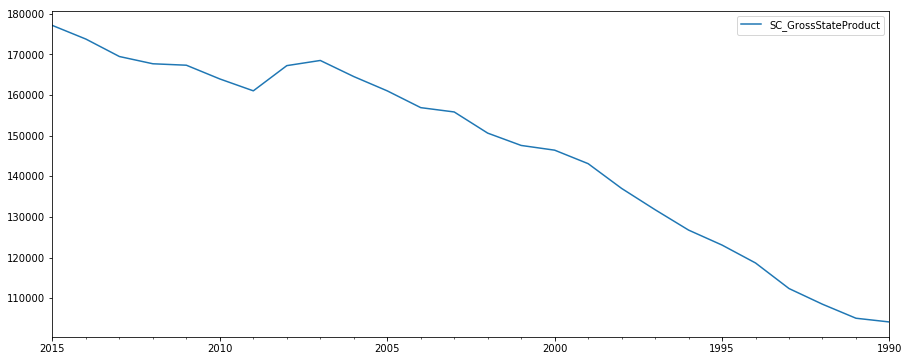

In [5]:
df.plot(figsize=(15, 6))
plt.show()

In [6]:
rolmean = pd.rolling_mean(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


In [7]:
rolstd = pd.rolling_std(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).std()
  if __name__ == '__main__':


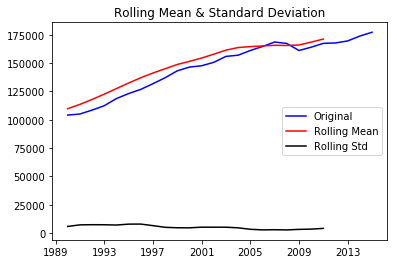

In [8]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Decomposition 

In [9]:
decomposition = seasonal_decompose(df)

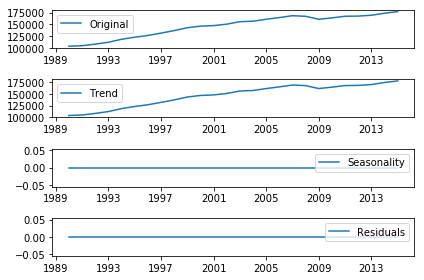

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Stationarity

In [11]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.ix[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).std()


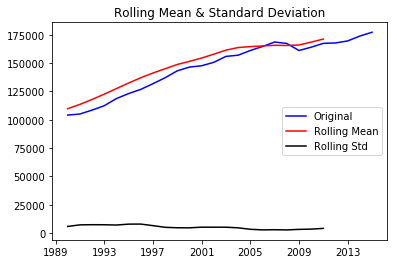

Results of Dickey-Fuller Test:
Test Statistic                  1.312556
p-value                         0.996678
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
Critical Value (1%)            -3.723863
dtype: float64


In [12]:
test_stationarity(df)

In [13]:
df_log=np.log(df)

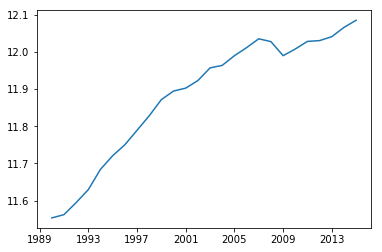

In [14]:
plt.plot(df_log)
plt.show()

In [20]:
#df_log

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).std()


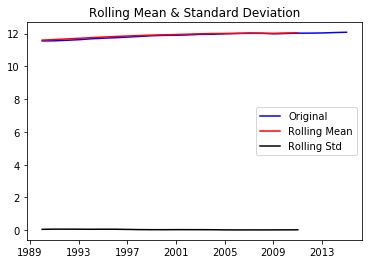

Results of Dickey-Fuller Test:
Test Statistic                  2.292201
p-value                         0.998950
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
Critical Value (1%)            -3.723863
dtype: float64


In [15]:
test_stationarity(df_log)

-15.8824779271


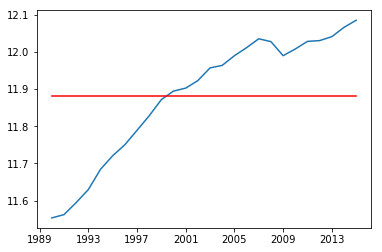

-43.7290439699774


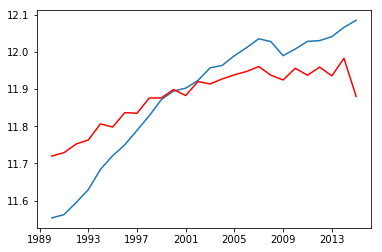

         AIC Modelname
0 -15.882478    (0, 0)
0 -43.729044    (0, 1)
Model selected:
(0, 1)
-43.7290439699774


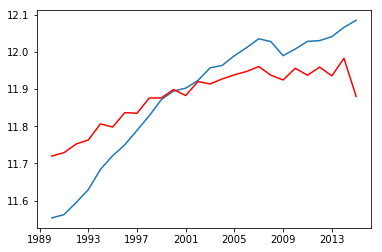

Forecasted values are:
[ 122213.83067908  144325.66932396  144325.66932396  144325.66932396
  144325.66932396]
Predicted existing values are:
2015-01-01    144325.669324
2014-01-01    159893.693983
2013-01-01    152568.267625
2012-01-01    156174.183422
2011-01-01    152791.505029
2010-01-01    155699.300586
2009-01-01    150870.965456
2008-01-01    152806.721916
2007-01-01    156390.860747
2006-01-01    154363.384093
2005-01-01    152965.438354
2004-01-01    151291.631396
2003-01-01    149262.580189
2002-01-01    150223.901249
2001-01-01    144692.469956
2000-01-01    147040.071433
1999-01-01    143765.711314
1998-01-01    143706.740567
1997-01-01    137951.843422
1996-01-01    138176.576665
1995-01-01    132940.866803
1994-01-01    134073.654506
1993-01-01    128409.313246
1992-01-01    126992.632789
1991-01-01    124084.409388
1990-01-01    122969.117136
dtype: float64


In [18]:
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    np.savetxt('ForecastedValues.csv', output, delimiter=",")
    print('Forecasted values are:')
    print(output)
    return output

def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=np.exp(fittedVal)
    np.savetxt('PredictedValues.csv', PredictedVal, delimiter=",")
    print('Predicted existing values are:')
    return PredictedVal

def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

def AR_Model(ts, param):
    
    model = tsa.ARMA(ts, order=param)
    results_AR = model.fit(disp=0)
    print(results_AR.aic)
    plt.plot(ts)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.show()
    cal_aic_metric(param,results_AR)
    return results_AR

def chooseModel(df_log):
    p = range(0, 1)
    q = range(0,2)
    pq = list(itertools.product(p, q))
    for param in pq:
        results=AR_Model(df_log, param)
    print(aic_metric)
    aic_metric.to_csv('AICMetric.csv', sep=",")
    paramNew=aic_metric['Modelname'][aic_metric['AIC']==aic_metric['AIC'].min()]
    paramNew=paramNew[0]
    print('Model selected:')
    print(paramNew)
    results_AR_final=AR_Model(df_log, paramNew)
    forecast(results_AR_final, 5)
    print(FittedValues(results_AR_final))
    return results_AR_final

aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}
chooseModel(df_log)

In [22]:
df_log_shift=df_log-df_log.shift()

In [23]:
df_log_shift.dropna(inplace=True)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).std()


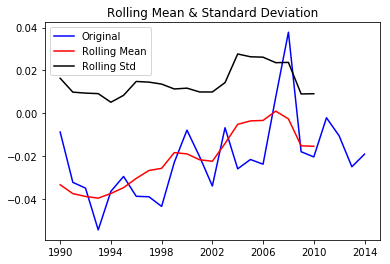

Results of Dickey-Fuller Test:
Test Statistic                 -2.850734
p-value                         0.051384
#Lags Used                      0.000000
Number of Observations Used    24.000000
Critical Value (5%)            -2.992216
Critical Value (1%)            -3.737709
Critical Value (10%)           -2.635747
dtype: float64


In [24]:
test_stationarity(df_log_shift)

# Determine p,q from ACF and PACF plots

In [25]:
lag_acf = acf(df_log_shift, nlags=10)
lag_pacf = pacf(df_log_shift, nlags=10, method='ols')

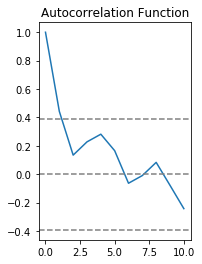

In [26]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

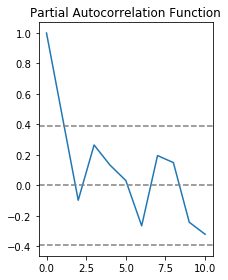

In [27]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Models

# AR Model

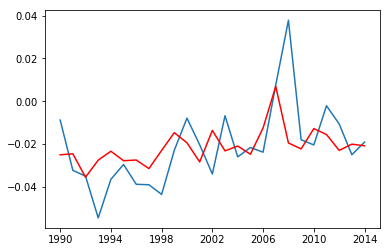

AIC: -126.5582


In [30]:
model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
ARAic=results_AR.aic

plt.plot(df_log_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_AR.aic)
#print('RSS: %.4f'% sum((results_AR.fittedvalues-df_log.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

In [31]:
result=results_MA.forecast(steps=2)[0]
result.tolist()
result=np.exp(result)
result

array([ 216695.21529843,  210768.71250087])

In [68]:
#df

# MA Model

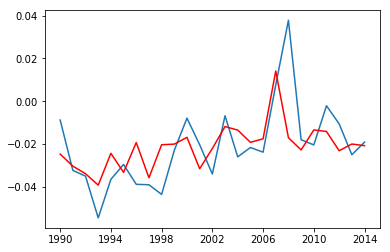

AIC: -124.8131
RSS: 0.0056


In [48]:
model = ARIMA(df_log, order=(0, 1, 5))  
results_MA = model.fit(disp=-1)
MAAic=results_MA.aic
plt.plot(df_log_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_MA.aic)
print('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_shift.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

# Combined Model

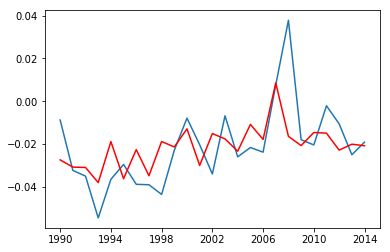

AIC: -125.3857


In [47]:
model = ARIMA(df_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
ARIMAAic=results_ARIMA.aic

plt.plot(df_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_ARIMA.aic)
#print('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log.ix[:,0])**2))

In [87]:
np.exp(results_AR.forecast()[0].tolist())
#out

array([ 76874.3916225])

# Choose the Model with low AIC

In [49]:
if (ARAic < MAAic) & (ARAic < ARIMAAic):
    out=results_AR.forecast(steps=10)[0]
    print('AR selected')
elif (MAAic < ARAic) & (MAAic < ARIMAAic):
    out=results_MA.forecast(steps=2)[0]
    print('MA selected')
elif (ARIMAAic < ARAic) & (ARIMAAic < MAAic):
    out=results_ARIMA.forecast(steps=2)[0]
    print('ARIMA selected')
#list(reversed(out))
listOne=out.tolist()
listOne=listOne[::-1]
listOne=np.exp(listOne)
list1=listOne.tolist()
dfList=df.ix[:,0].tolist()
newList=list1+dfList
newList

AR selected


[85351.7737028772,
 87146.87850853964,
 88979.74421583716,
 90851.24229251475,
 92762.48395119353,
 94715.03362845811,
 96710.24975664869,
 98743.19264086058,
 100777.06679000062,
 102675.05220390786,
 177141.0,
 173785.0,
 169493.0,
 167708.0,
 167352.0,
 163968.0,
 161045.0,
 167251.0,
 168522.0,
 164558.0,
 161037.0,
 156906.0,
 155842.0,
 150633.0,
 147597.0,
 146434.0,
 143113.0,
 137016.0,
 131772.0,
 126755.0,
 123065.0,
 118656.0,
 112361.0,
 108497.0,
 105048.0,
 104128.0]

In [74]:
#df_new=pd.DataFrame(data=newList)

In [167]:
index=df.index

In [175]:
dataframe1=pd.read_csv('DC_UnemploymentRate.csv', header=0)

In [171]:
dataframe1.head()

,Year,DC_UnemploymentRate
Year,,
1977-01-01,1977,9.158333
1978-01-01,1978,8.250000
1979-01-01,1979,7.025000
1980-01-01,1980,7.375000
1981-01-01,1981,8.908333


In [176]:
index_vals = pd.to_datetime(dataframe1.ix[:,0], format='%Y')
dataframe1 = dataframe1.set_index(index_vals)
dataframe1 = dataframe1.sort_index()
dataframe1.drop('Year', axis=1, inplace=True)
    
    # dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
    
    
    # dataframe1 = dataframe1.set_index(dataframe1.ix[:,0])
    # dataframe1.drop('Column 0', axis=1, inplace=True)
    # dataframe1 = dataframe1.sort_index()
ts_log = dataframe1.apply(lambda x: np.log(x))
model = ARIMA(ts_log, order=(2, 0, 3))
print(ts_log)
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.fittedvalues)
forcasted_values = np.exp(np.array(results_ARIMA.fittedvalues.values.tolist()))
print(forcasted_values)

            DC_UnemploymentRate
Year                           
1977-01-01             2.214664
1978-01-01             2.110213
1979-01-01             1.949475
1980-01-01             1.998096
1981-01-01             2.186987
1982-01-01             2.345804
1983-01-01             2.415914
1984-01-01             2.213754
1985-01-01             2.096995
1986-01-01             2.019338
1987-01-01             1.845827
1988-01-01             1.616082
1989-01-01             1.590934
1990-01-01             1.835245
1991-01-01             2.047693
1992-01-01             2.149822
1993-01-01             2.143003
1994-01-01             2.075266
1995-01-01             2.171907
1996-01-01             2.132192
1997-01-01             2.080483
1998-01-01             2.131203
1999-01-01             1.851076
2000-01-01             1.724254
2001-01-01             1.845827
2002-01-01             1.857599
2003-01-01             1.921813
2004-01-01             2.051985
2005-01-01             1.852384
2006-01-